## (Core) Resampling Datetime Data
For this assignment, you will be working with a modified version of weather data from London from Kaggle.

The assignment is split into 2 parts:

* Part 1: Load the data and create a datetime index

* Part 2: Answer 2 Questions using visualizations and the correct frequency data

## Part 1) Load the data and make a datetime index.
* Use the modified version of the data provided here:
    * Share URL: https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit?usp=sharing
    * Raw URL:
        * https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv

You must first load the data and create a datetime index.

1. Convert the date column to datetime dtype.
2. Set the date column as the index.
3. Filter out only the required data:
    * Keep only data from the year 2000 or later.
    * Keep only the following features:
    * precipitation
    * mean_temp
    * min_temp
    * max_temp
    * snow_depth
4. Impute any missing values.
    * Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

## Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)
* For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
* Plot the feature that the question is asking about.
    * If there is a specific time period, plot only that time period.

Note: you may want to make a temporary DataFrame that you will use to answer this question only.

### Q1: What month had the most precipitation between 2000 through 2010?
* Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
* Find the date and corresponding value for the max precipitation.
* Plot the feature and time period that corresponds to the question.
    * Make sure to meet the "Visualization Requirements" below!
* Determine the date and value for the most precipitation (the max precipitation).
* Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    * Make sure to add a legend so that your label is visible.

## Visualization Issue Workaround
* NOTE: Pandas' .plot method currently has a bug with 4-digit year axis labels. The tick labels misbehave when being formatted with matplotlib and will produce a mostly-blank axis with 1 year labeled, like the screenshot below:

* To get around this issue, first, create your fig and ax using plt.subplots()
    * Now you may use pandas .plot method to plot this figure by adding the argument "ax=ax" to .plot().

fig, ax = plt.subplots(figsize=(12,3))
df.plot(ax=ax)

### Q1 Visualization Requirements
* Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    * Create a wide figure (e.g. figsize=(12,3))
        * With the title "Precipitation for 2000-2010"
        * With a ylabel of "Inches"
    * Customize the major xaxis ticks to:
        * Have major xaxis ticks every 1 year.
        * Use 4-digit years for the labels
        * Rotate the major ticks' labels 90 degrees.
    * Customize the minor xaxis ticks to:
        * Have minor xaxis ticks every 3 months
        * Do not label the minor ticks.

### Q2: Which year between 2000-2020 had the coolest average temperature?
* Resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.
* Plot the feature and time period that corresponds to the question.
    * Make sure to meet the "Visualization Requirements" below!
* Determine the year and value for the lowest mean temp.
* Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

### Q2 Visualization Requirements
* Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    * Create a wide figure (e.g. figsize=(12,3))
        * With the title "Average Temperature"
        * With a ylabel of "Degrees"
    * Customize the major xaxis ticks to:
        * Have major xaxis ticks every 5 years.
        * Use 4-digit years for the labels
        * Rotate the major ticks' labels 90 degrees.
    * Customize the minor xaxis ticks to:
        * Have minor xaxis ticks every 1 year
        * Do not label the minor ticks.

Submit the link to the notebook in your GitHub repository.

## Part 1) Load the data and make a datetime index.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Load the data
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


### 1. Convert the date column to datetime dtype.

In [3]:
# INCORRECT - does not parse dates correctly
pd.to_datetime(df['date'])

0       1970-01-01 00:00:00.019790101
1       1970-01-01 00:00:00.019790102
2       1970-01-01 00:00:00.019790103
3       1970-01-01 00:00:00.019790104
4       1970-01-01 00:00:00.019790105
                     ...             
15336   1970-01-01 00:00:00.020201227
15337   1970-01-01 00:00:00.020201228
15338   1970-01-01 00:00:00.020201229
15339   1970-01-01 00:00:00.020201230
15340   1970-01-01 00:00:00.020201231
Name: date, Length: 15341, dtype: datetime64[ns]

In [4]:
# CORRECT - properly recognizes dates and does not interpret them as seconds
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

### 2. Set the date column as the index.

In [5]:
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [6]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

### 3. Filter out only the required data:
* Keep only data from the year 2000 or later.
* Keep only the following features:
    * precipitation
    * mean_temp
    * min_temp
    * max_temp
    * snow_depth

In [7]:
df = df.loc['2000':, ['precipitation','mean_temp', 'min_temp', 
                               'max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


### 4. Impute any missing values.
* Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [8]:
# check for missing values
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [9]:
# fill missing values of precipitation and snow_depth with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [10]:
# interpolate missing values of temperature columns
df['mean_temp'] = df['mean_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()

In [11]:
# check if missing values still exist
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)
### Q1: What month had the most precipitation between 2000 through 2010?
* Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
* Find the date and corresponding value for the max precipitation.
* Plot the feature and time period that corresponds to the question.
    * Make sure to meet the "Visualization Requirements" below!
* Determine the date and value for the most precipitation (the max precipitation).
* Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    * Make sure to add a legend so that your label is visible.

In [105]:
precip_ts = df['precipitation'].copy()
precip_ts

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2020-12-27    2.0
2020-12-28    0.2
2020-12-29    0.0
2020-12-30    0.0
2020-12-31    0.0
Name: precipitation, Length: 7671, dtype: float64

In [106]:
# Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
precip_ts_MS_res = precip_ts.resample("MS").sum()
precip_ts_MS_res.name = 'Resampled'
precip_ts_MS_res.head()

date
2000-01-01    14.3
2000-02-01    62.2
2000-03-01    13.4
2000-04-01    71.8
2000-05-01    68.4
Freq: MS, Name: Resampled, dtype: float64

In [114]:
precip_ts_MS_res_filtered = precip_ts_MS_res.loc['2000':'2010']
precip_ts_MS_res_filtered

date
2000-01-01    14.3
2000-02-01    62.2
2000-03-01    13.4
2000-04-01    71.8
2000-05-01    68.4
              ... 
2010-08-01    83.8
2010-09-01    38.0
2010-10-01    61.0
2010-11-01    22.0
2010-12-01    21.2
Freq: MS, Name: Resampled, Length: 132, dtype: float64

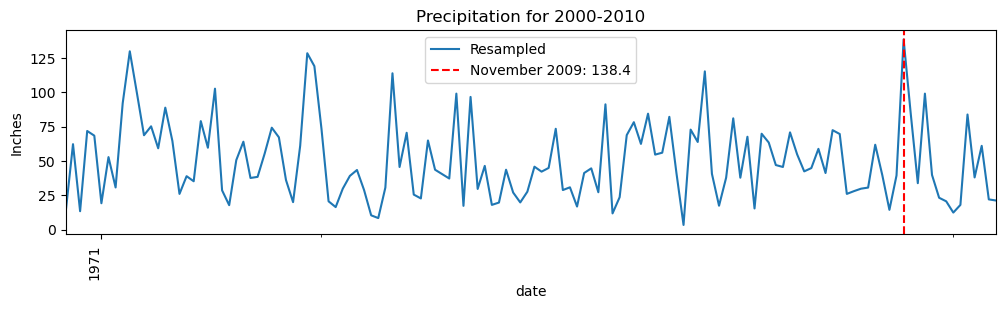

In [115]:
# plot the data
fig, ax = plt.subplots(figsize=(12,3))
precip_ts_MS_res_filtered.plot(ax=ax, title='Precipitation for 2000-2010', ylabel='Inches')

# Find the date and corresponding value for the max precipitation
max_precip_date = precip_ts_MS_res_filtered.idxmax()
max_precip_value = precip_ts_MS_res_filtered.max()

# Highlighting the max precipitation
ax.axvline(max_precip_date, color='red', ls='--', label=f'{max_precip_date.strftime("%B %Y")}: {max_precip_value}')

# customize major ticks
maj_loc_year = mdates.YearLocator(1)
maj_fmt_year = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(maj_loc_year)
ax.xaxis.set_major_formatter(maj_fmt_year)

# customize minor ticks
min_loc_months = mdates.MonthLocator(interval=3)

ax.xaxis.set_minor_locator(min_loc_months)

# improve the layout
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

ax.legend();

### Q2: Which year between 2000-2020 had the coolest average temperature?
* Resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.
* Plot the feature and time period that corresponds to the question.
    * Make sure to meet the "Visualization Requirements" below!
* Determine the year and value for the lowest mean temp.
* Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

In [112]:
mean_temp_ts = df['mean_temp'].copy()
mean_temp_ts

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
             ... 
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Name: mean_temp, Length: 7671, dtype: float64

In [113]:
# Resample the mean_temp data to a Yearly frequency using .mean() as the aggregation method
mean_temp_Y_res = mean_temp_ts.resample("Y").mean()
mean_temp_Y_res.name = 'Resampled'
mean_temp_Y_res.head()

date
2000-12-31    11.575683
2001-12-31    11.331507
2002-12-31    12.084247
2003-12-31    12.114521
2004-12-31    11.900683
Freq: A-DEC, Name: Resampled, dtype: float64

In [118]:
mean_temp_Y_res_filtered = mean_temp_Y_res.loc['2000':]
mean_temp_Y_res_filtered

date
2000-12-31    11.575683
2001-12-31    11.331507
2002-12-31    12.084247
2003-12-31    12.114521
2004-12-31    11.900683
2005-12-31    11.822877
2006-12-31    12.290822
2007-12-31    11.944384
2008-12-31    11.326776
2009-12-31    11.721644
2010-12-31    10.657397
2011-12-31    12.366438
2012-12-31    11.300956
2013-12-31    11.166301
2014-12-31    12.658904
2015-12-31    12.123699
2016-12-31    11.906284
2017-12-31    12.242466
2018-12-31    12.501370
2019-12-31    12.206164
2020-12-31    12.723634
Freq: A-DEC, Name: Resampled, dtype: float64

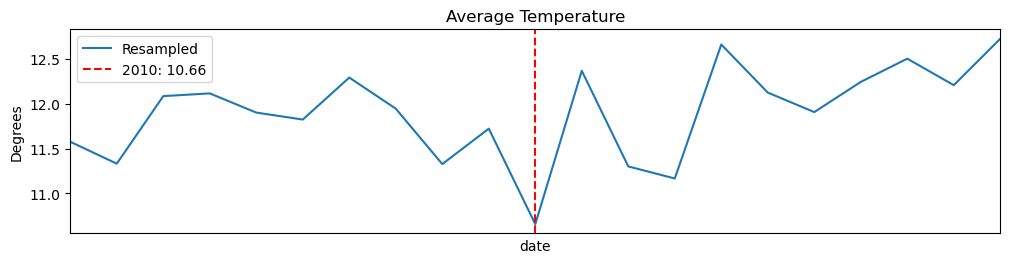

In [120]:
# plot the data
fig, ax = plt.subplots(figsize=(12,3))
mean_temp_Y_res_filtered.plot(ax=ax, title='Average Temperature', ylabel='Degrees')

# Determine the year and value for the lowest mean temp
lowest_mean_temp_res_date = mean_temp_Y_res_filtered.idxmin()
lowest_mean_temp_res_value = mean_temp_Y_res_filtered.min()

# Highlighting the lowest mean temp
ax.axvline(lowest_mean_temp_res_date, color='red', linestyle='--', 
           label=f'{lowest_mean_temp_res_date.strftime("%Y")}: {lowest_mean_temp_res_value:.2f}')

# customize major ticks
maj_loc_year = mdates.YearLocator(5)
maj_fmt_year = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(maj_loc_year)
ax.xaxis.set_major_formatter(maj_fmt_year)

# customize minor ticks
min_loc_year = mdates.YearLocator(1)

ax.xaxis.set_minor_locator(min_loc_year)

# improve the layout
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

ax.legend();